In [35]:
#A simple project to determine if time on app or time on website by their customers contributes to better sales of their products

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#getting the data
customers = pd.read_csv("D:/Coding Stuff/Machine Learning Projects/Machine-Learning-Projects/Ecommerce Customers.csv")

In [12]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [15]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

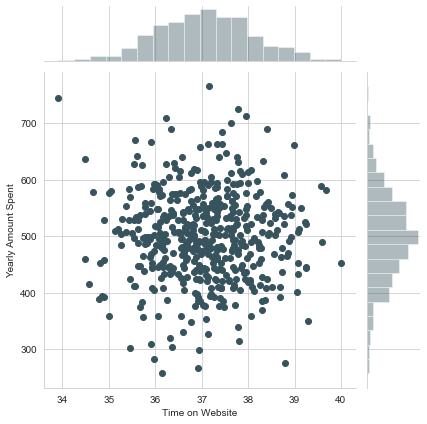

In [16]:
#Joint plot between avg time spent on website by the customers and teh yearly amount spent by them on the company products
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

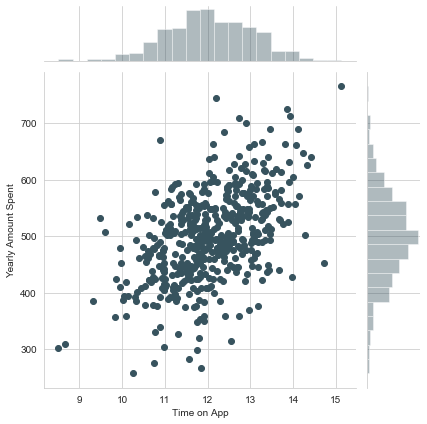

In [17]:
#Joint plot between avg time spent on app by the customers and teh yearly amount spent by them on the company products
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

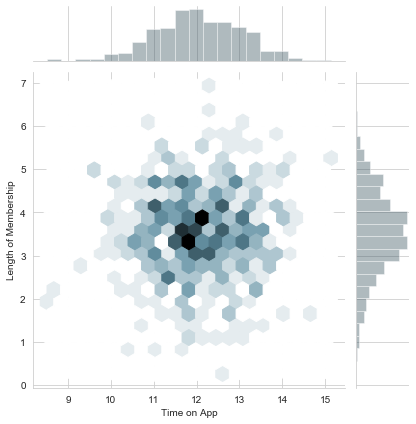

In [18]:
#Joint plot between avg time spent on website by the customers and the length of their membership with the company
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind="hex")

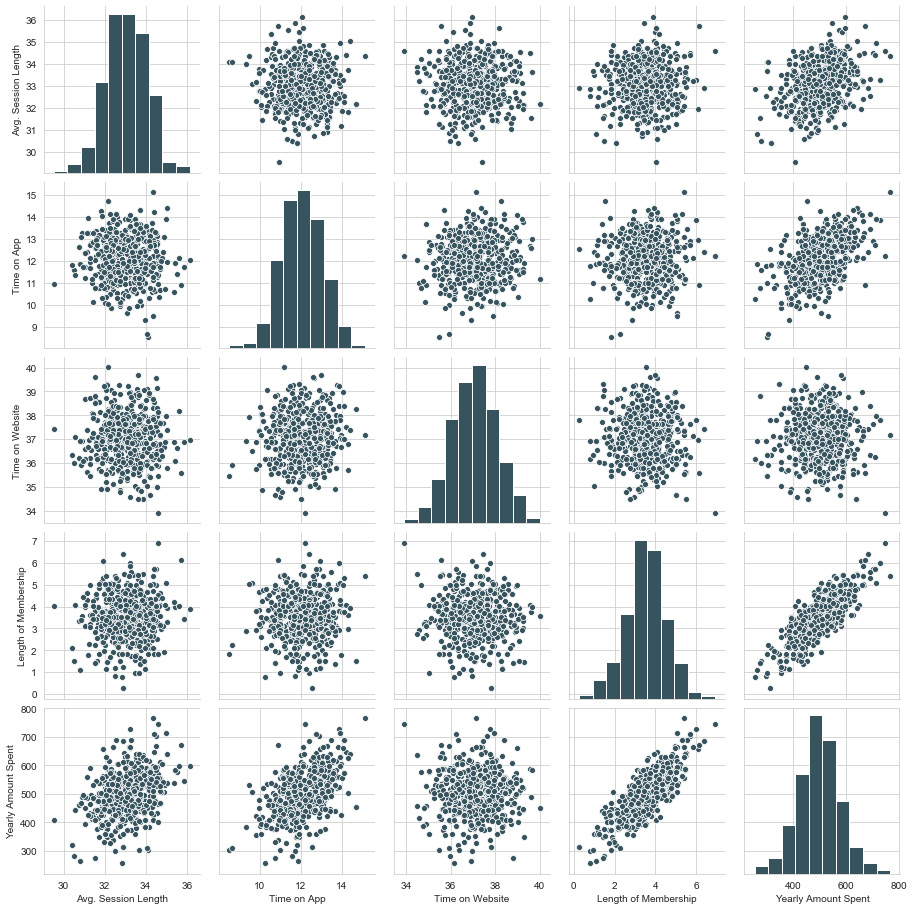

In [19]:
#Pairplot for the dataset
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

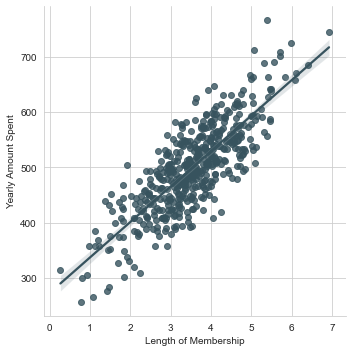

In [20]:
#From the above pairplot, we come to a conclusion that Length of membership is the attribute that is most correlated to YEarly Amount Spent
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

In [21]:
#Input Data
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
#Output Data
Y = customers['Yearly Amount Spent']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 101)

In [23]:
#Instantiating and training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

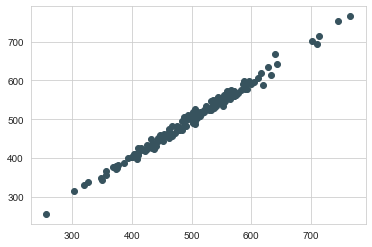

In [30]:
#Predicting the results from the trained model
predicted = lm.predict(X_test)
#Scatter plot of predicted and actual values
plt.scatter(Y_test, predicted)

In [31]:
#Checking the accuracy of the model
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test, predicted))
print(metrics.mean_squared_error(Y_test, predicted))
print(np.sqrt(metrics.mean_squared_error(Y_test, predicted)))

7.228148653430838
79.81305165097461
8.933815066978642


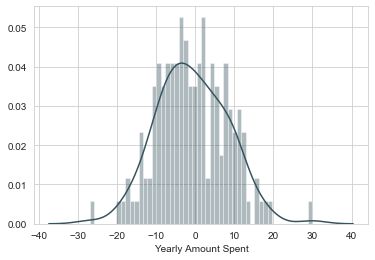

In [32]:
#Checking if the predicted data is normally distributed
sns.distplot(Y_test-predicted, bins = 50, kde = True)

In [33]:
pd.DataFrame(lm.coef_, X.columns, columns =  ['Coef'])

,Coef
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [34]:
#From these coefficients, we can conclude that the most contributing factor towards the customers spending more money purchasing the company's products is their avg time on App. The time on website is almost insignificant in determning the amount spent by them on the company's products.